# Importing libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
with open('/content/drive/MyDrive/Heart Disease Prediction/Datasets/df_combined.pickle', 'rb') as f:
    df = pickle.load(f)

# Splitting into training and testing sets

In [3]:
X, y = df.drop(columns=['num']).values, df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Naïve Bayes classifier and making predictions

In [4]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

# Results for training dataset

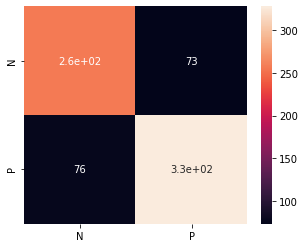

In [7]:
cm = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(cm, index=['N','P'], columns = ['N','P'])
plt.figure(figsize=(5,4))
plt.clf()
res = sns.heatmap(df_cm, annot=True)

In [8]:
accuracy_score(y_train, y_pred_train)

0.7970027247956403

In [9]:
recall_score(y_train, y_pred_train)

0.8118811881188119

In [10]:
tn, fp, fn, tp = cm.ravel()
tnr_train = 1 - fp / (tn + fp)
print(tnr_train)

0.7787878787878788


In [11]:
precision_score(y_train, y_pred_train)

0.8179551122194514

In [12]:
f1_score(y_train, y_pred_train)

0.8149068322981367

# Results for testing dataset

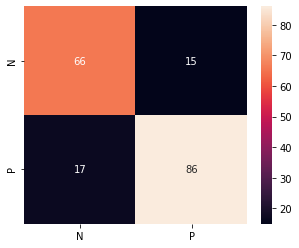

In [13]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['N','P'], columns = ['N','P'])
plt.figure(figsize=(5,4))
plt.clf()
res = sns.heatmap(df_cm, annot=True)

In [14]:
accuracy_score(y_test, y_pred)

0.8260869565217391

In [15]:
recall_score(y_test, y_pred)

0.8349514563106796

In [16]:
tn, fp, fn, tp = cm.ravel()
tnr_test = 1 - fp / (tn + fp)
print(tnr_test)

0.8148148148148149


In [17]:
precision_score(y_test, y_pred)

0.8514851485148515

In [18]:
f1_score(y_test, y_pred)

0.8431372549019608

# Results Summary

In [19]:
results = {
     'Model': 'Naïve Bayes',
     'Training Dataset Accuracy': accuracy_score(y_train, y_pred_train),
     'Testing Dataset Accuracy': accuracy_score(y_test, y_pred),
     'Training Dataset Sensitivity' : recall_score(y_train, y_pred_train),
     'Testing Dataset Sensitivity' : recall_score(y_test, y_pred),
     'Training Dataset Precision' : precision_score(y_train, y_pred_train),
     'Testing Dataset Precision' : precision_score(y_test, y_pred),
     'Training Dataset Specificity' : tnr_train,
     'Testing Dataset Specificity' : tnr_test,
     'Training Dataset F-Score' : f1_score(y_train, y_pred_train),
     'Testing Dataset F-Score' : f1_score(y_test, y_pred),
}

pd.DataFrame(results, index=[0])

,Model,Training Dataset Accuracy,Testing Dataset Accuracy,Training Dataset Sensitivity,Testing Dataset Sensitivity,Training Dataset Precision,Testing Dataset Precision,Training Dataset Specificity,Testing Dataset Specificity,Training Dataset F-Score,Testing Dataset F-Score
0,Naïve Bayes,0.797003,0.826087,0.811881,0.834951,0.817955,0.851485,0.778788,0.814815,0.814907,0.843137
